## Linear Regression with multiple variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
w = 10 * np.random.rand(5) - 5
b = 30 * np.random.rand() - 15
w, b

(array([2.47437765, 4.45628207, 2.0825051 , 3.17463648, 1.27811541]),
 -11.33978047213445)

In [3]:
x_train = 20 * np.random.rand(100, 5) - 10
y_train = np.dot(x_train, w) + b + (60 * np.random.rand(100) - 30)
x_train.shape, y_train.shape

((100, 5), (100,))

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    return np.sum((np.dot(x, w) + b - y) ** 2) / (2 * m)

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.dot(np.dot(x, w) + b - y, x) / m
    dj_db = np.sum(np.dot(x, w) + b - y) / m
    return dj_dw, dj_db

In [8]:
import copy
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i: 4d}: Cost {J_history[-1]:8.2f}    ")
    
    return w, b, J_history

In [9]:
w_init = np.zeros_like(w)
b_init = 0.0

iterations = 1000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost   516.78    
Iteration  100: Cost   154.06    
Iteration  200: Cost   148.34    
Iteration  300: Cost   147.48    
Iteration  400: Cost   147.35    
Iteration  500: Cost   147.33    
Iteration  600: Cost   147.33    
Iteration  700: Cost   147.33    
Iteration  800: Cost   147.33    
Iteration  900: Cost   147.33    
b,w found by gradient descent: -9.82,[2.87354932 4.12998929 2.14147499 3.80968576 1.50113415] 


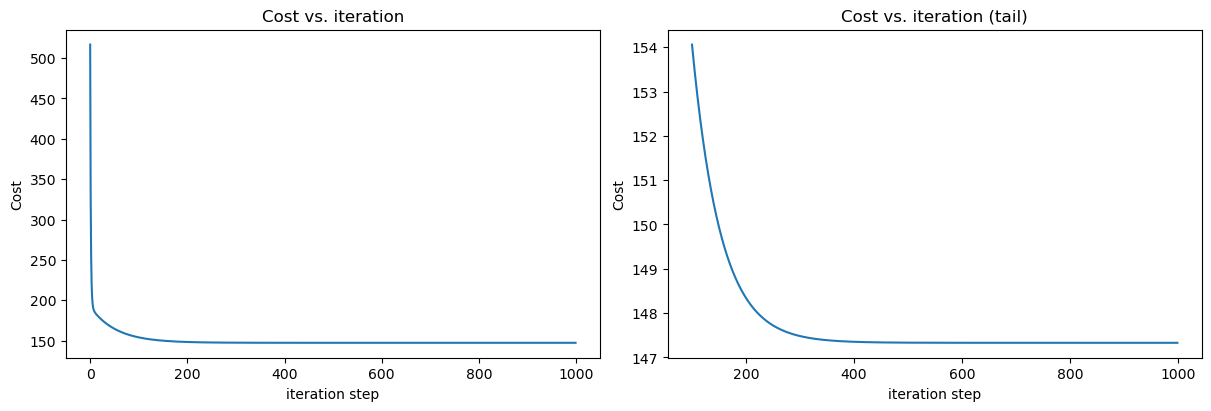

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [11]:
for i in range(len(w)):
    print(f"Actual w[{i}] selected randomly: {w[i]},\tPredicted w[{i}]: {w_final[i]}")

print(f"Actual b selected randomly: {b},\tPredicted b: {b_final}")


Actual w[0] selected randomly: 2.4743776453422175,	Predicted w[0]: 2.873549324120939
Actual w[1] selected randomly: 4.456282067511674,	Predicted w[1]: 4.129989294866373
Actual w[2] selected randomly: 2.0825051042816636,	Predicted w[2]: 2.141474985358496
Actual w[3] selected randomly: 3.1746364834811356,	Predicted w[3]: 3.8096857628707177
Actual w[4] selected randomly: 1.2781154077974621,	Predicted w[4]: 1.5011341497675128
Actual b selected randomly: -11.33978047213445,	Predicted b: -9.817727104970988
